## WKB Approximation for semi-infinite quartic potential well

Below is my attempt at plotting the eigenfunctions of the time independent Schrodinger Equation:

# $\frac{- \hbar}{2 m}  \frac{d^2 \psi}{d x^2} + V(x) \psi (x) = E \psi (x)$

for the Potential:

$V(x) = \infty ..........................x < 0$
      
      
$V(x) = \mu ^2 x^2  -  A x^3  + \lambda x^4 ...........x > 0$


where $\mu , A, \lambda > 0$   

and    A > 2$\mu \sqrt{\lambda}$ 

so as to maintain potential of shape shown below:

In [1]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib nbagg

<IPython.core.display.Javascript object>


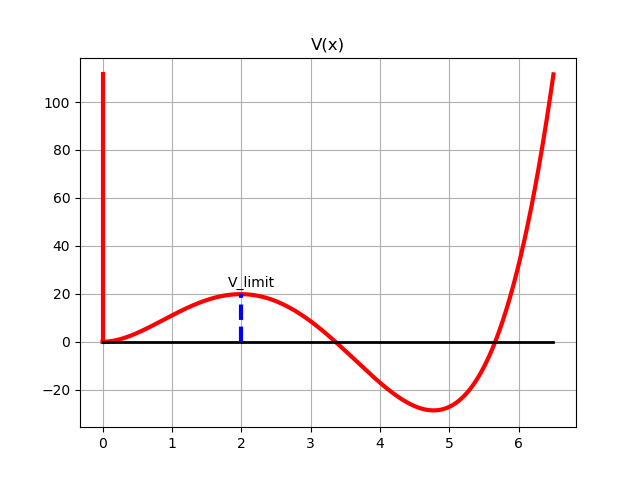

In [5]:
plt.close()
x_display = np.linspace(0, 6.5, 1000)
V_display = lambda x: (x**2)*(19 - 9.017*x + x**2)
plt.plot(x_display, V_display(x_display), 'r-', linewidth= 3)
plt.plot([0, 0], [0, V_display(6.5)], 'r-', linewidth= 3)
plt.plot([0, 6.5], [0, 0], 'k-', linewidth= 2)
plt.plot([2, 2], [0, 20], 'b--', linewidth= 3)
plt.text(1.8, 23, "V_limit")
plt.title("V(x)")
plt.grid(True)
plt.show()

In [6]:
plt.close()

This code allows you to vary m, $\mu$, $\lambda$, and dA, in the cell below:

In [7]:
#Assuming lam, mu, dA > 0 (so as to maintain expected potential curve)
#Enter values for m, lam, mu and dA

m = 1
lam = 1
mu = np.sqrt(19)
dA = 0.3

In [8]:
import sympy as sp
from scipy import special

In [9]:
intlim = 500
h = 1 #By convention, scaling h_bar = 1

In [10]:
A = 2*mu*np.sqrt(lam) + dA

V = lambda x: (x**2)*(mu**2 - A*x + lam*x**2)

x_localmax = (3*A - np.sqrt(9*A**2 - 32*mu*mu*lam))/8*lam
                      
V_limit = V(x_localmax)

In [11]:
print(V_limit)

19.858644535775227


Attempting to find E that satisfies below equation

$\int_{0}^{x_0}{|p(x)|dx} = (n - \frac{1}{4}).\pi.h$


where n is an integer > 0

Note that both p(x) and $x_0$ are related to E, because

p(x) = $\sqrt {2 m (E - V(x))}$

and

$x_0$ is the *first* point for which V($x_0$) = E

In [12]:
p = lambda x, E: np.sqrt(abs(2*m*(E - V(x))))

In [13]:
def p_integral(a, b, E_guess):
    '''
    Integrates |p(x)| from a to b, for a given E value
    Uses trapezoid numerical integration.
    
    a, b >= 0
    '''
    
    n = int(intlim)
    dx = (b - a)/n
    
    x_start = a
    x_final = b
    area = dx*((p(x_start, E_guess) + p(x_final, E_guess))/2)
    
    for i in range(2, n):
        area += dx*(p(x_start + i*dx, E_guess))
    
    return area

In [18]:
def E_finder(n, case):
    '''
    Takes an n value, and case, to return corresponding E_n (Energy level)
    Case True -> want Energy levels less than V_limit
    Case False -> want Energy levels greater than V_limit
    
    Also returns all points where E intersects V(x), and corresponding alpha values.
    
    Uses bisection search method.
    '''
    
    if case:
        E_first = V_limit/2
        lower = 0
        upper = V_limit
        
        
    else:
        E_first = 5*V_limit
        lower = V_limit
        upper = 100*V_limit

    
    x00 = sp.Symbol('x0')
    
    roots = sp.solve((x00**2)*(mu**2 - A*x00 + lam*x00**2) - E_first, x00)
    
    int_points = []
    for element in roots:
        imag = float(sp.im(element))
        real = float(sp.re(element))
        #print(type(imag))
        if abs(imag) <= 1e-10 and real >= 0:
            int_points.append(float(sp.re(element)))
    
    E_guess = E_first
    
    test = False
    attempts = 0
    
    while test == False:
        attempts += 1
        
        roots = sp.solve((x00**2)*(mu**2 - A*x00 + lam*x00**2) - E_guess, x00)
    
        int_points = []
        for element in roots:
            imag = float(sp.im(element))
            real = float(sp.re(element))
            #print(type(imag))
            
            if abs(imag) <= 1e-10 and real >= 0:
                int_points.append(float(sp.re(element)))
        
        p = p_integral(0, int_points[0], E_guess)
        
        arg = p - (n - 0.25)*np.pi*h
        
        if abs(arg) < 1e-4:
            test = True
        else:
            if arg < 0:
                lower = E_guess
                E_guess = (lower + upper)/2
                
                #print("arg < 0... ", arg)
                
            else:
                upper = E_guess
                E_guess = (lower + upper)/2
                
                #print("arg > 0..." , arg)
            
            #print("lower = ", lower)
            #print("E_guess = ", E_guess)
            #print("upper = ", upper)
            #print()
        
        if attempts > 30:
            #print("Couldn't find good E_n for given n")
            #print("Difference = ", arg)
            #print()
            break

    #print("For n = ", n, ", Approximate energy level = ", round(E_guess, 3))
    #print()
    #print("Intersection points between E and V(x) = ", int_points)
    
   
    alphas = []
    for element in int_points:
        V_pr_x0 = 2*(mu**2)*element - 3*A*(element**2) + 4*lam*(element**3)
        if V_pr_x0 > 0:
            alphas.append((2*m*V_pr_x0/(h**2))**(1/3))
        else:
            alphas.append(-1*((2*m*abs(V_pr_x0)/(h**2))**(1/3)))
    
    
    
    return E_guess, np.array(int_points), np.array(alphas), test

Have shown below, illustrative examples of above code working for the specific values of

m = 1

$\mu = \sqrt {19}$

$\lambda$ = 1

dA = 0.3

Please skip next few lines when running code for functional purposes

In [17]:
ex_a = E_finder(1, True) #First energy level for region E < V_limit;

For n =  1 , Approximate energy level =  7.817

Intersection points between E and V(x) =  [0.7910192220884319, 3.032324953604876, 5.7601999838128926]


In [21]:
ex_b = E_finder(11, True) #11th energy level for region E < V_limit

Couldn't find good E_n for given n
Difference =  -26.070994994181206

For n =  11 , Approximate energy level =  19.859

Intersection points between E and V(x) =  [1.990343604541758, 1.9904013917867647, 5.888360451344748]


In [16]:
ex_c = E_finder(1, False) #First energy level for region E > V_limit

Couldn't find good E_n for given n
Difference =  30.656170580829716

For n =  1 , Approximate energy level =  19.859

Intersection points between E and V(x) =  [5.888360452157471]


In [20]:
ex_d = E_finder(11, False) #11th energy level for region E > V_limit

For n =  11 , Approximate energy level =  20.282

Intersection points between E and V(x) =  [5.892484443984118]


In [23]:
print(ex_b)
print()
print(ex_d)

(19.858644531151526, array([1.9903436 , 1.99040139, 5.88836045]), array([ 0.10858225, -0.10858245,  5.89453877]), False)

(20.28211340385912, array([5.89248444]), array([5.90525316]), True)


Have gotten rid of the print statements that helpfully output the above information, to prevent redundancy, and not waste coomputational resources during rest of code.

Below, code continues, to compare $\textbf {analytic wavefunctions derived from WKB Approximation}$, and $\textbf{wavefunctions obtained by numerically solving the above ODE (Schrodinger's equation)}$.


Note that the numerical solutions required normalization constants from their analytic counterparts.

And the analytic solutions themselves required numerical integration to find the elliptical integrals within the functions... and the normalization constants...

And finallly, the normalization constants are approximate since we could not integrate till infinity...

$\int_{-\infty}^{\infty} |\psi|^2 dx$ = 1 ${=}^{here}$ $\int_{0}^{\infty} |\psi|^2 dx$  $\approx$  $\int_{0}^{xlim} |\psi|^2 dx$ 

In [19]:
def function_integrator(fn, x_values):
    '''
    Takes function array (i.e. array of "y values"), 
    and integrates it from a to b; a, b > 0 (rectangluar integration)
    '''
    n = len(fn)
    area = 0
    for i in range(1, n):
        area += (x_values[i] - x_values[i - 1])*(fn[i] + fn[i - 1])/2
    return area

In [20]:
def analytic_solver(n, E_n, int_points, alphas):
    '''
    Produces waveforms from the closed form solution to the Schroedinger equation, 
    obtained analytically (from the WKB approximation)
    Refer theory notes.
    Returns nth eigenfunction of above equation, y, and corresponding x values
    Also returns normalization constant.
    '''
    
    xlim = int_points[-1] + 0.7 #gives approximate range of useful x that gives relevant wave function
    x_array = np.linspace(0, xlim, int(1e3))
    
    if len(int_points) == 1:
        y_array = []
        area = []
        y_array.append(0)
        area.append((n - 0.25)*np.pi*h)
        #print(area)
        
        for i in range(1, len(x_array)):
            argument_0 = alphas[0]*(x_array[i] - int_points[0])
            
            if argument_0 < -0.557:
                ar = p_integral(x_array[i], int_points[0], E_n)
                y = 2*np.sin((1/h)*ar + np.pi/4)/np.sqrt(p(x_array[i], E_n))
                y_array.append(y)
                area.append(ar)
            
            if argument_0 > 2:
                ar = p_integral(int_points[0], x_array[i], E_n)
                y = (np.e)**((-1/h)*ar)/np.sqrt(p(x_array[i], E_n))
                y_array.append(y)
                area.append(ar)
                
            if argument_0 < 2 and argument_0 > -0.557:
                ar = p_integral(int_points[0], x_array[i], E_n)
                ai, aip, bi, bip = special.airy(argument_0)
                y_array.append(2*(np.sqrt(np.pi/(alphas[0]*h)))*ai)
                area.append(ar)
        
        y_array = np.array(y_array)
    
    else:
        y_array = []
        area = []
        y_array.append(0)
        area.append((n - 0.25)*np.pi*h)
        
        integral = p_integral(int_points[0], int_points[1], E_n)
        gamma = (np.e)**(-1*integral)
        
        for i in range(1, len(x_array)):
            argument_0 = alphas[0]*(x_array[i] - int_points[0])
            
            argument_1 = alphas[1]*(x_array[i] - int_points[1])
            
            argument_2 = alphas[2]*(x_array[i] - int_points[2])
            
            
            if argument_0 < -2:
                ar = p_integral(x_array[i], int_points[0], E_n)
                y = np.sin((1/h)*ar + np.pi/4)/np.sqrt(p(x_array[i], E_n))
                y = y*np.sqrt(h*alphas[0]/np.pi)
                y_array.append(y)
                area.append(ar)
            
            elif argument_0 < 2 and argument_0 > -2 and (-1)*argument_1 < -2:
                ar = p_integral(int_points[0], x_array[i], E_n)
                ai, aip, bi, bip = special.airy(argument_0)
                y_array.append(ai)
                area.append(ar)
            
            elif argument_0 > 2 and (-1)*argument_1 < -2:
                ar = p_integral(int_points[0], x_array[i], E_n)
                y = (np.e)**((-1/h)*ar)/np.sqrt(p(x_array[i], E_n))
                y = y*0.5*np.sqrt(h*alphas[0]/np.pi)
                y_array.append(y)
                area.append(ar)
                
            elif (-1)*argument_1 < 2 and (-1)*argument_1 > -2 and argument_2 < -2:
                ar = p_integral(int_points[0], x_array[i], E_n)
                ai, aip, bi, bip = special.airy(argument_1)
                y_array.append((np.sqrt(alphas[0]/abs(alphas[1])))*gamma*bi)
                area.append(ar)
            
            elif (-1)*argument_1 > 2 and argument_2 < -2:
                ar = p_integral(x_array[i], int_points[2], E_n)
                y = np.sin((1/h)*ar + np.pi/4)/np.sqrt(p(x_array[i], E_n))
                y = y*np.sqrt(h*alphas[0]/np.pi)*gamma*((-1)**(n-1))
                y_array.append(y)
                area.append(ar)
            
            elif argument_2 < 2 and argument_2 > -2 and (-1)*argument_1 > 2:
                ar = p_integral(int_points[0], x_array[i], E_n)
                ai, aip, bi, bip = special.airy(argument_2)
                y_array.append((np.sqrt(alphas[0]/alphas[2]))*gamma*ai*((-1)**(n-1)))
                area.append(ar)
            
            else:
                ar = p_integral(int_points[2], x_array[i], E_n)
                y = (np.e)**((-1/h)*ar)/np.sqrt(p(x_array[i], E_n))
                y = y*0.5*np.sqrt(h*alphas[0]/np.pi)*gamma*((-1)**(n-1))
                y_array.append(y)
                area.append(ar)
        
        y_array = np.array(y_array)
    
    #print(len(x_array), len(y_array))    
    probability_density = (abs(y_array))**2
    k = function_integrator(probability_density, x_array)
    normalization_constant = 1/np.sqrt(k)
    
    y_array = normalization_constant*y_array
    
    return x_array, y_array , normalization_constant

In [21]:
dydt = lambda x, y, v, E: v
dvdt = lambda x, y, v, E: -1*2*m*(E - V(x))*y/h**2

In [27]:
def runge_kutta(fn, t, yv, E, dt):
    '''
    Solves 2nd order ODE y" + p(t)y' + q(t)y = r(y, t)
    written as a coupled system of 2 ODE.
    Provides both Euler (Finite-difference) and 
    4th Stage Runge-Kutta method solution.
    
    MUST BE USED ITERATIVELY.
    
    This method takes in:
    
    an array of variables 'yv', where:
    y = yv[0]
    v = yv[1] = y'
    
    And
    an array of functions 'fn', where:
    
    y' = dydt = fn[0] = v
    y" = dvdt = fn[1] = v'
    '''
    yr = yv[0]
    vr = yv[1]
    
    fn1 = fn[0] #dy/dt
    fn2 = fn[1] #dv/dt
    
    c1 = fn1(t, yr, vr, E)
    l1 = fn2(t, yr, vr, E)
    
    c2 = fn1(t + (dt/2), yr + (c1/2)*dt, vr + (l1/2)*dt, E)
    l2 = fn2(t + (dt/2), yr + (c1/2)*dt, vr + (l1/2)*dt, E)
    
    c3 = fn1(t + (dt/2), yr + (c2/2)*dt, vr + (l2/2)*dt, E)
    l3 = fn2(t + (dt/2), yr + (c2/2)*dt, vr + (l2/2)*dt, E)
    
    c4 = fn1(t + dt, yr + c3*dt, vr + l3*dt, E)
    l4 = fn2(t + dt, yr + c3*dt, vr + l3*dt, E)
    
    y_runge = yr + (c1 + 2*c2 + 2*c3 + c4)*dt/6
    v_runge = vr + (l1 + 2*l2 + 2*l3 + l4)*dt/6    
    
    return y_runge, v_runge

In [30]:
def ode_solver(n, E_n, int_points, alphas, normalization_constant=1):
    '''
    Solves Schroedinger equation NUMERICALLY with given p(x) and initial conditions
    Returns nth eigenfunction of above equation, y, and corresponding x values.
    '''
    
    xlim = int_points[-1] + 0.7 #gives approximate range of useful x that gives relevant wave function
    
    dx = xlim/intlim
    #print(dx)
    
    x0 = 0 #start at x = 0
    y0 = 0 #Because @ x = 0, V = infinity, in our question -> no wave function. (Scaled to E when plotting)
    
    
    #Refer theory part -> used work from analytic part
    if len(int_points) == 1:
        v0 = 2*normalization_constant*((-1)**(n-1))*((2*m*E_n)**(0.25))
    
    else:
        v0 = np.sqrt(h*alphas[0]/np.pi)*normalization_constant*((-1)**(n-1))*((2*m*E_n)**(0.25))
    
    x_array = []
    y_array = []
    v_array = []
    
    x_array.append(x0)
    y_array.append(y0)
    v_array.append(v0)
    
    for i in range(1, intlim):
        x_array.append(x_array[i-1] + dx)
        
        y, v = runge_kutta([dydt, dvdt], x_array[i-1], [y_array[i-1], v_array[i-1]], E_n, dx)
        
        y_array.append(y)
        v_array.append(v)
    
        
    return np.array(x_array), np.array(y_array), np.array(v_array)

Now to plot the results:

<IPython.core.display.Javascript object>


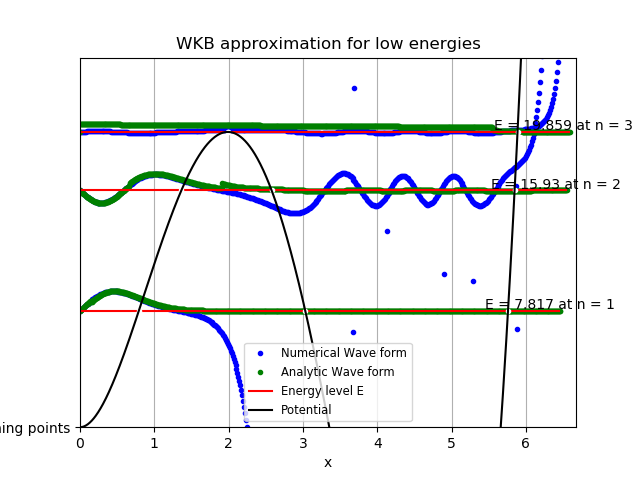

<IPython.core.display.Javascript object>


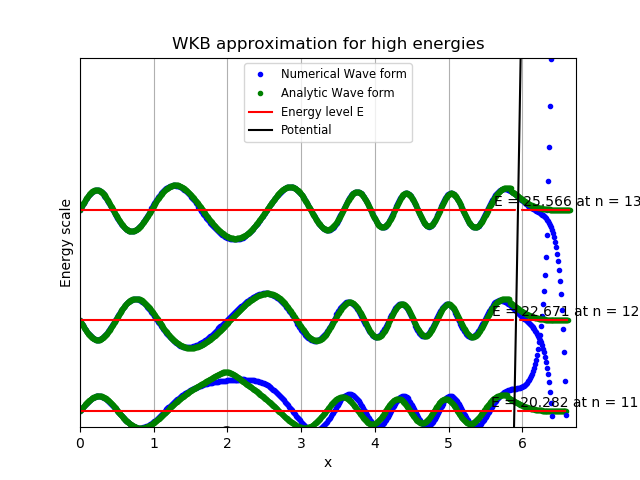

In [32]:
plt.close()

for flag in range(2):
    case = False
    if flag == 0:
        case = True
        
        '''
        In the region E < V_limit and x < x_0, Potential is primarily quadratic.
        
        So *approximating* E = (n - (1/4))*h*w, where w = mu*sqrt(2/m)... 
        {(mu^2)*(x^2) approximately = (1/2)*m*(w^2)*(x^2) (Harmonic oscillator potential)}
        
        This is just to find a reasonable maximum n such that E < V_limit.
        
        [There are times when V_limit is too small for n to have an integer value greater than 0
        i.e.
        V_limit*sqrt(m/2)/(h*mu) + 0.25 < 1
        
        This implies that there are no possible energy levels in that region.
        In such cases, only high energy wavefunctions will be plotted.]
        
        The same wavefunction carries on to x > x_0 regions (by continuity). 
        So finding this is good enough for the whole system.
        '''
        n_max = V_limit*np.sqrt(m/2)/(h*mu) + 0.25
        
        test = int(n_max + 1)
        if test > 1:
            fig1 = plt.figure()
            
            for n in range(1, test):
                info = E_finder(n, case)
                awave = analytic_solver(n, info[0], info[1], info[2])
                nwave = ode_solver(n, info[0], info[1], info[2], awave[-1])
                if n != test - 1:
                    plt.plot(nwave[0], nwave[1] + info[0], 'b.')
                    plt.plot(awave[0], awave[1] + info[0], 'g.')
                    plt.plot((0, nwave[0][-1]), (info[0], info[0]), 'r-')
                    plt.plot(info[1], V(info[1]), 'w.')
                    label_graph = "E = " + str(round(info[0], 3)) + " at n = " + str(n)
                    plt.text(nwave[0][-70] - 0.1, info[0] + 0.1, label_graph)
                
                else:
                    plt.plot(nwave[0], nwave[1] + info[0], 'b.', label= 'Numerical Wave form')
                    plt.plot(awave[0], awave[1] + info[0], 'g.', label= 'Analytic Wave form')
                    plt.plot((0, nwave[0][-1]), (info[0], info[0]), 'r-', label= 'Energy level E')
                    plt.plot(info[1], V(info[1]), 'w.', "Turning points")
                    label_graph = "E = " + str(round(info[0], 3)) + " at n = " + str(n)
                    plt.text(nwave[0][-70] - 0.1, info[0] + 0.1, label_graph)
                    plt.plot(awave[0], V(awave[0]), 'k-', label= 'Potential')
                    plt.grid(True)
                    plt.title("WKB approximation for low energies")
                    plt.ylabel("Energy scale")
                    plt.xlabel("x")
                    plt.xlim(0, nwave[0][-1] + 0.1)
                    plt.ylim(0, info[0] + 5)
                    plt.legend(loc= 8, fontsize= 'small')      
    
    if flag == 1:
        case = False
        
        '''
        In the region E > V_limit, finding a minimum n, is a bit brute force.
        If V_limit = 0, minimum n = 1. But that is not the case, generally.
        The n < minimum n, fall in the E < V_limit region. So they are handled separately
        (by the code in the upper half of this cell)
        
        And there is no maximum n, where E > V_limit... because infinite open
        potential.
        So just plotting the minimum n and the next 2 energy levels.
        '''
        
        n_start = 1
        t = E_finder(1, case)
        trying = t[-1]
        
        while trying == False:
            #print(n_start)
            n_start += 1
            t = E_finder(n_start, case)
            trying = t[-1]
        
        fig2 = plt.figure()
        
        for n in range(n_start, n_start + 3):
                info = E_finder(n, case)
                awave = analytic_solver(n, info[0], info[1], info[2])
                nwave = ode_solver(n, info[0], info[1], info[2], awave[-1])
                if n != n_start + 2:
                    plt.plot(nwave[0], nwave[1] + info[0], 'b.')
                    plt.plot(awave[0], awave[1] + info[0], 'g.')
                    plt.plot((0, nwave[0][-1]), (info[0], info[0]), 'r-')
                    plt.plot(info[1], V(info[1]), 'w.')
                    label_graph = "E = " + str(round(info[0], 3)) + " at n = " + str(n)
                    plt.text(nwave[0][-70] - 0.1, info[0] + 0.1, label_graph)
                
                else:
                    plt.plot(nwave[0], nwave[1] + info[0], 'b.', label= 'Numerical Wave form')
                    plt.plot(awave[0], awave[1] + info[0], 'g.', label= 'Analytic Wave form')
                    plt.plot((0, nwave[0][-1]), (info[0], info[0]), 'r-', label= 'Energy level E')
                    plt.plot(info[1], V(info[1]), 'w.', "Turning Points")
                    label_graph = "E = " + str(round(info[0], 3)) + " at n = " + str(n)
                    plt.text(nwave[0][-70] - 0.1, info[0] + 0.1, label_graph)
                    plt.plot(awave[0], V(awave[0]), 'k-', label= 'Potential')
                    plt.grid(True)
                    plt.title("WKB approximation for high energies")
                    plt.ylabel("Energy scale")
                    plt.xlabel("x")
                    plt.xlim(0, nwave[0][-1] + 0.1)
                    plt.ylim(V_limit, info[0] + 4)
                    plt.legend(loc= 9, fontsize= 'small')  


plt.show()

In [38]:
plt.close()
plt.close()

# Noteworthy points:
1. Numerical and Analytic wavefunctions are in good agreement for high energies and/or in the region right before the first turning point (the graphs even overlap!)
2. Numerical approximation breaks down if there is a region where E << V(x). Because the process is iterative, if the values become "too negative" or "too positive", everything goes awry
3. Numerical approximation shows a lot of scattered points (unaccounted for) in the low energies regimen
4. When E = V_limit, Analytic wavefunction breaks down (note how $\psi_{analytic} (0) \neq 0$ and how it basically flatlines)... but Numerical wavefunction works as well as it does in the high energies regime
5. The choice of "when to use exact Airy function" and "when to use it's asymptotic approximation", in the plotting of Analytic wavefunction, was made arbitrarily (or rather, by making an educated guess). Hence there are slight discontinuities in the Analytic wave function.
6. As stated before, Numerical wavefunction did require normalization constant for inital conditions (which was found analytically). It should be noted that the numerical solution was VERY sensitive to initial conditions.
7. As stated before, Analytic functions utilized numerical integration methods to evaluate elliptical integrals and find the normalization constant
8. Numerical wavefunction does not seem to exhibit any kind of "damping" (decay in amplitude of wavefunction) after passing through potential hill
9. Numerical solution is very sensitive to the slightest perturbation (drawing from points 2, 3 and 6)

# Afterthoughts:

1. Perhaps solving the ODE numerically, would be better achieved with boundary conditions (and a corresponding new method of solving) than the use of initial conditions and the Runge_Kutta method.
2. Analytic solution behaves as expected (YAY!) and exhibits tunneling, as seen in code below:

(Note how frequency of oscillation varies with difference in energy and potential)

In [27]:
info1 = E_finder(1, True)
awave1 = analytic_solver(1, info1[0], info1[1], info1[2])
info2 = E_finder(11, False)
awave2 = analytic_solver(11, info2[0], info2[1], info2[2])

<IPython.core.display.Javascript object>


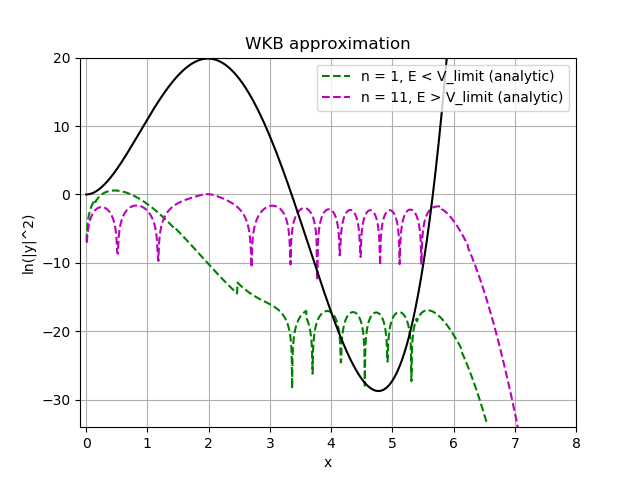

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [33]:
plt.close()
fig3 = plt.figure()
plt.plot(awave1[0], np.log(abs(awave1[1])**2), 'g--', label= 'n = 1, E < V_limit (analytic)')
plt.plot(awave2[0], np.log(abs(awave2[1])**2), 'm--', label= 'n = 11, E > V_limit (analytic)')
plt.plot(awave[0], V(awave[0]), 'k-')
plt.grid(True)
plt.title("WKB approximation")
plt.ylabel("ln(|y|^2)")
plt.xlabel("x")
plt.xlim(-0.1, 8)
plt.ylim(-34, 20)
plt.legend(loc= 1)
plt.show()